<h2>PROJECT CITYBIKE LUBLIN 

<span style="color:red">We don't have complete data, so we have to do analysis two times. First we will compare city bike in Lublin in 2016 (March, April, May) and 2017(March, April, May), and next 2014(October, November) and 2016(October, November).

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

<h1>1. FIRST PART OF ANALYSIS (2016 vs 2017)

In [2]:
c_b17 = pd.read_csv('c_b17')

c_b17.sample(3)

,Unnamed: 0,bike_name,start_time,end_time,start_place_id,end_place_id,start_day,start_month,day_of_month,day_of_week,duration,duration_sec,duration_min,duration_hour,date,start_hour
81048,88160,69333,2017-04-24 20:02:16,2017-04-24 20:09:45,315254,674094,114,4,24,0,0 days 00:07:29.000000000,449,7.483333,0.124722,2017-04-24,20
34093,37194,69739,2017-04-02 15:32:43,2017-04-02 18:00:17,674353,674353,92,4,2,6,0 days 02:27:34.000000000,8854,147.566667,2.459444,2017-04-02,15
52268,57232,69667,2017-04-07 11:05:28,2017-04-07 11:22:31,674272,315236,97,4,7,4,0 days 00:17:03.000000000,1023,17.050000,0.284167,2017-04-07,11


In [3]:
city_bike16 = pd.read_csv('c_b16')

#get only part of data frame which include information about data from March to May

c_b16_march = city_bike16[city_bike16['start_month']==3]

c_b16_april = city_bike16[city_bike16['start_month']==4]

c_b16_may = city_bike16[city_bike16['start_month']==5]

In [4]:
c_b16 = pd.concat(objs=[c_b16_march,c_b16_april,c_b16_may], ignore_index=True)

c_b16.sample(3)

,Unnamed: 0,bike_name,start_time,end_time,start_place_id,end_place_id,start_day,start_month,day_of_month,day_of_week,duration,duration_sec,duration_min,duration_hour,date,start_hour
259404,282756,69460,2016-05-24 18:05:00,2016-05-24 18:15:00,315248,674230,145,5,24,1,0 days 00:10:00.000000000,600,10.000000,0.166667,2016-05-24,18
24022,25962,69853,2016-04-03 17:50:23,2016-04-03 18:10:21,674153,315245,94,4,3,6,0 days 00:19:58.000000000,1198,19.966667,0.332778,2016-04-03,17
301678,328971,69906,2016-05-24 10:33:00,2016-05-24 10:43:00,674023,315270,145,5,24,1,0 days 00:10:00.000000000,600,10.000000,0.166667,2016-05-24,10


In [5]:
#For how many days were the bikes available for rental?

num_of_days = c_b16['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas in 2016')

num_of_days = c_b17['start_day'].nunique()

print(f'The bikes were available for rental for {num_of_days} dyas in 2017')

The bikes were available for rental for 72 dyas in 2016
The bikes were available for rental for 72 dyas in 2017


In [6]:
#How many rentals and bikes were there?

num_of_bikes = c_b16['bike_name'].nunique()

num_of_rent = c_b16['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, count of bikes: {num_of_bikes} in 2016')

num_of_bikes = c_b17['bike_name'].nunique()

num_of_rent = c_b17['bike_name'].count()

print(f'Count of rentals:{num_of_rent}, count of bikes: {num_of_bikes} in 2017')

Count of rentals:304238, count of bikes: 891 in 2016
Count of rentals:185291, count of bikes: 850 in 2017


In [7]:
#The average time of a rental:

avg_time = c_b16['duration_min'].mean()

print(f'The average time of rental: {avg_time} in 2016')

avg_time = c_b17['duration_min'].mean()

print(f'The average time of rental: {avg_time} in 2017')

The average time of rental: 18.24584837090261 in 2016
The average time of rental: 17.7577186695522 in 2017


In [8]:
#Rentals under 20 minutes

rentals_under_20 = len(c_b16[c_b16['duration_min']<20])

print('Num of rentals under 20 minutes in 2016:', rentals_under_20)

rentals_under_20 = len(c_b17[c_b17['duration_min']<20])

print('Num of rentals under 20 minutes in 2016:', rentals_under_20)

Num of rentals under 20 minutes in 2016: 239639
Num of rentals under 20 minutes in 2016: 148309


In [9]:
#Most popular month


month = {3:'March',4:'April',5:'May'}

top_month = c_b16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]} /2016')

c_b16.groupby('start_month').agg({'bike_name':'count'}).sort_values(by=['bike_name'], ascending=False)

top_month = c_b17.groupby('start_month').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular month is: {month[top_month]} /2017')


The most popular month is: May /2016
The most popular month is: May /2017


In [10]:
#Daily top score

top_day = c_b16.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')

top_day = c_b17.groupby('date').agg({'bike_name':'count'}).sort_values(by='bike_name', ascending=False).iloc[0].name

print(f'The most popular day: {top_day}')


The most popular day: 2016-04-05
The most popular day: 2017-04-02


In [11]:
#Most popular start station

top_s_station = c_b16['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_s_station} in 2016')

top_s_station = c_b17['start_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_s_station} in 2017')

The most popular start station number: 315269 in 2016
The most popular start station number: 315269 in 2017


In [12]:
#Most popular end station

top_end_station = c_b16['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_end_station} in 2016')

top_end_station = c_b17['end_place_id'].value_counts().head(1).index[0]

print(f'The most popular start station number: {top_end_station} in 2017')

The most popular start station number: 315269 in 2016
The most popular start station number: 315269 in 2017


In [13]:
#How often the bikes were rented

#2016 

freq_2016 = 22032000 // 783692

print(f'The bikes were rented every {freq_2016} sec. in 2016')

#2017

freq_2017 = 6220800 // 185291

print(f'The bikes were rented every {freq_2017} sec. in 2017')

The bikes were rented every 28 sec. in 2016
The bikes were rented every 33 sec. in 2017


In [14]:
#Create a plot for average rent number per month

#2016

average_rent_16 = c_b16.groupby('start_month').agg({'bike_name':'count'}) #I count num of rent per month

average_rent_16['num_day_in_month'] = c_b16.groupby(['start_month'])[['day_of_month']].nunique() #I count num of days in month

average_rent_16['result'] = average_rent_16['bike_name']//average_rent_16['num_day_in_month'] #I count average rent number for every month

print('Average rent number per month in 2016\n',average_rent_16,'\n\n')

#2017

average_rent_17 = c_b17.groupby('start_month').agg({'bike_name':'count'}) 

average_rent_17['num_day_in_month'] = c_b17.groupby(['start_month'])[['day_of_month']].nunique() 

average_rent_17['result'] = average_rent_17['bike_name']//average_rent_17['num_day_in_month'] 

print('Average rent number per month in 2017\n',average_rent_17)

Average rent number per month in 2016
              bike_name  num_day_in_month  result
start_month                                     
3                15941                11    1449
4               131390                30    4379
5               156907                31    5061 


Average rent number per month in 2017
              bike_name  num_day_in_month  result
start_month                                     
3                25909                11    2355
4                61829                30    2060
5                97553                31    3146


In [15]:
d = {'2016':average_rent_16['result'].to_list(), '2017':average_rent_17['result'].to_list()}

df = pd.DataFrame(data=d, index=['March','April','May'])

df

,2016,2017
March,1449,2355
April,4379,2060
May,5061,3146


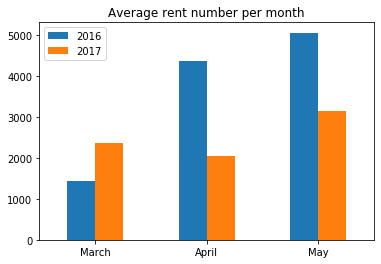

In [16]:
df.plot(y = ['2016','2017'],use_index=True, kind='bar',rot=360, title = 'Average rent number per month', legend = True);

In [17]:
#Create a plot for average rent number per day of week in 2016

rent_num_16 = c_b16.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week

num_of_day_df = pd.DataFrame(c_b16.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_16['num_of_days']=num_of_day_df['day_of_week']

rent_num_16['num_per_day'] = rent_num_16['bike_name']['count'] / rent_num_16['num_of_days']

rent_num_16.round(2)

,bike_name,num_of_days,num_per_day
,count,,
day_of_week,,,
0,45026,11,4093.27
1,51089,11,4644.45
2,46973,10,4697.30
3,48360,10,4836.00
4,41951,10,4195.10
5,32592,10,3259.20
6,38247,10,3824.70


In [18]:
#Create a plot for average rent number per day of week

rent_num_17 = c_b17.groupby('day_of_week').agg({'bike_name':['count']}) #I count num of rentals per day of week

num_of_day_df = pd.DataFrame(c_b17.groupby(['date'])['day_of_week'].unique().value_counts()).sort_index()

rent_num_17['num_of_days']=num_of_day_df['day_of_week']

rent_num_17['num_per_day'] = rent_num_17['bike_name']['count'] / rent_num_17['num_of_days']

rent_num_17.round(2)

,bike_name,num_of_days,num_per_day
,count,,
day_of_week,,,
0,30209,10,3020.90
1,33206,11,3018.73
2,26204,11,2382.18
3,21604,10,2160.40
4,23715,10,2371.50
5,25652,10,2565.20
6,24701,10,2470.10


In [19]:
d = {'2016':rent_num_16['num_per_day'].to_list(), '2017':rent_num_17['num_per_day'].to_list()}

df = pd.DataFrame(data=d, index=['Monday','Tuesday','Wednesday','Thuersday','Friday','Saturday','Sunday'])

df

,2016,2017
Monday,4093.272727,3020.900000
Tuesday,4644.454545,3018.727273
Wednesday,4697.300000,2382.181818
Thuersday,4836.000000,2160.400000
Friday,4195.100000,2371.500000
Saturday,3259.200000,2565.200000
Sunday,3824.700000,2470.100000


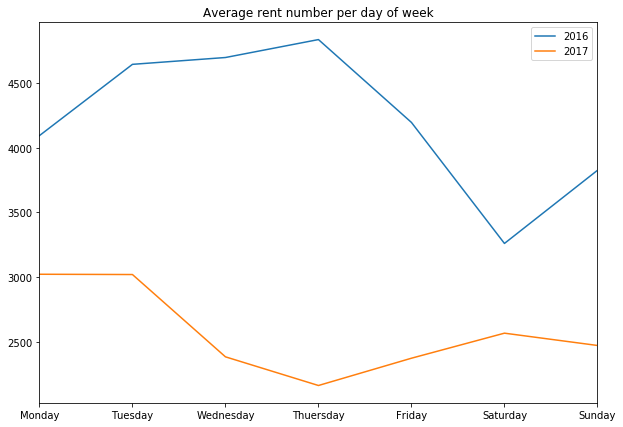

In [20]:
df.plot(y = ['2016','2017'],kind='line',rot=360, figsize = (10,7),title = 'Average rent number per day of week', legend = True);

In [21]:
#Create a plot for average time of rent per day of week

ave_time_16 = c_b16.groupby('day_of_week').agg({'duration_min':'mean'})
ave_time_16.reset_index(inplace=True)
ave_time_16

,day_of_week,duration_min
0,0,16.869096
1,1,17.708470
2,2,16.111439
3,3,17.212339
4,4,16.632039
5,5,20.593935
6,6,24.281774


In [22]:
ave_time_17 = c_b17.groupby('day_of_week').agg({'duration_min':'mean'})
ave_time_17.reset_index(inplace=True)
ave_time_17

,day_of_week,duration_min
0,0,17.186919
1,1,16.463803
2,2,15.869589
3,3,14.956857
4,4,16.013885
5,5,21.136126
6,6,22.813689


In [23]:
d={'2016': ave_time_16['duration_min'].to_list(), '2017':ave_time_17['duration_min'].to_list()}

df = pd.DataFrame(data=d, index=['Monday','Tuesday','Wednesday','Thuersday','Friday','Saturday','Sunday'])

df

,2016,2017
Monday,16.869096,17.186919
Tuesday,17.708470,16.463803
Wednesday,16.111439,15.869589
Thuersday,17.212339,14.956857
Friday,16.632039,16.013885
Saturday,20.593935,21.136126
Sunday,24.281774,22.813689


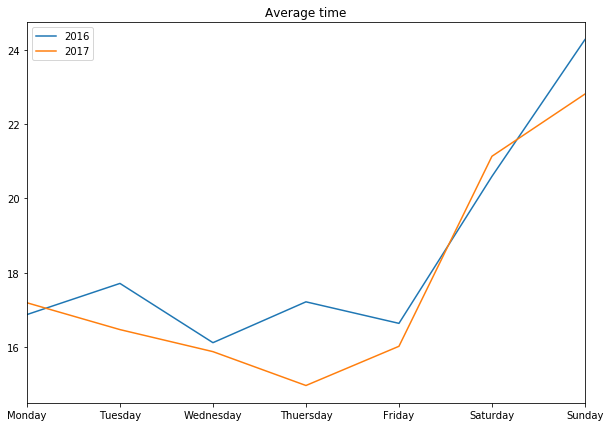

In [24]:
df.plot(y = ['2016','2017'],kind='line',rot=360, figsize = (10,7),title = 'Average time', legend = True);

In [25]:
#Create a plot for average number of rents per hour 

ave_rent_per_h_16= c_b16.groupby(['start_hour']).agg({'bike_name':'count'})

ave_rent_per_h_16.head()

,bike_name
start_hour,
0,4534
1,2910
2,1654
3,999
4,905


In [26]:
ave_rent_per_h_17= c_b17.groupby(['start_hour']).agg({'bike_name':'count'})

ave_rent_per_h_17.head()

,bike_name
start_hour,
0,2973
1,1830
2,1048
3,630
4,530


In [27]:
d = {'2016':ave_rent_per_h_16['bike_name'].to_list() ,'2017':ave_rent_per_h_17['bike_name'].to_list()}

df = pd.DataFrame(data=d)

df.head()

,2016,2017
0,4534,2973
1,2910,1830
2,1654,1048
3,999,630
4,905,530


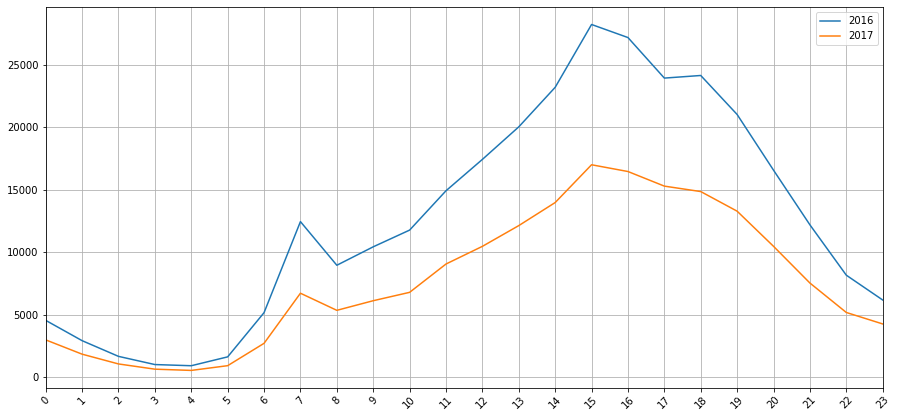

In [31]:
df.plot(y = ['2016','2017'],kind ='line', figsize = (15,7), use_index=True, xticks = (range(24)),rot = 45, grid=True);
                   


<h1>CONCLUSIONS

<span style="color:red">1.I compare first 3 months from 2016 and 2017. The bikes were available by 72 days.
    
<span style="color:red">2.In 2016 were more available bikes than 2017(891 vs 850). It was the one reasons why in 2016 were more rentals than 2017 (304238 vs 185291). The second reason could by the weather. In 2017 average day's temperature was lower than 2016 at the same period.
    
<span style="color:red">3.The average time of rental was similar in 2016 and 2017 (18.24 vs 17.75).

<span style="color:red">4.Rentals under 20 minutes are 78% all rentals in 2016 and 80% in 2017.

<span style="color:red">5.The most popular month in both year was May.

<span style="color:red">6.The most popular day in 2016 was 5th April - it was on Tuesday, very sunny day. In 2017 top day was 2th April, on very sunny Sunday.
    
<span style="color:red">7.The most popular start and end station is the same in both cases - station 315269
    
<span style="color:red">8.The bikes were renter every 28 sec in 2016 and every 33 sec in 2017.
    
<span style="color:red">9.The average rent number per month was higer in 2016 in April and May but lower in March. We can notice that num of rent in 2017 is similar in every month. In 2016 in March were definitely fewer rentals than April and May - upward trend
 
<span style="color:red">10.The average num rent per day of week in 2016 and 2017 is higer in the week tha at the weekend. The most popular day in 2016 wa Thuersday and in 2017 Monday. 

<span style="color:red">11.The average time of rent is higer at the weekend than the week. People have more time to go for a bike ride at the weekend. In the week bikes are usefull for travel to job or school so rentals are shorter.
    
<span style="color:red">12.The average number of rents per hour is very similar in 2016 and 2017. We can see increase num of rent beetwen 7 and 8 a.m and 3 and 4 p.m - we can assume that for many people the bicycle is a kind of transport to and from work and school 
    
<span style="color:red">